# HomeWork 3 

Arshak Parsa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Problem 1

## Part A

In [3]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In [4]:
n, p = (y.shape[0], 2)
print(f"n = {n}, p = {p}")

n = 100, p = 2


The equation of the model is

$$ y_i = x_i - 2 x_i^2 + \epsilon_i $$

## Part B

Text(0, 0.5, 'y')

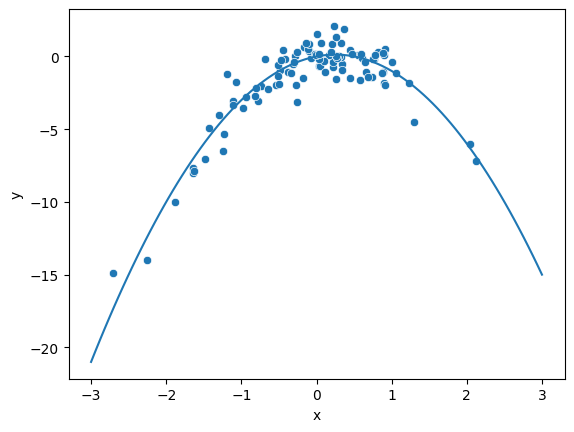

In [5]:
x_gen = np.linspace(-3, 3, 100)
y_gen = x_gen - 2 * x_gen**2

sns.scatterplot(x = x,y = y)
plt.plot(x_gen, y_gen)
plt.xlabel('x')
plt.ylabel('y')

As you can see there is a quadratic pattern as we expected!

## Part C

In [6]:
x.reshape(-1, 1).shape

(100, 1)

In [7]:
from sklearn.linear_model import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut, cross_validate,KFold
from sklearn.preprocessing import PolynomialFeatures

def do_cv(seed,fold):
    for i in range(1,5):
        model = Pipeline([
        ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
        ('regressor', LinearRegression())
        ])
        scores_cv = cross_validate(model,x.reshape(-1, 1),y, cv = KFold(n_splits=fold, random_state=seed, shuffle=True), scoring = 'neg_mean_squared_error')
        model.fit(x.reshape(-1,1),y)
        #print(f'Model coefs are {model['regressor'].coef_}')
        print(f'MSE for polynomial of degree {i} is ',-scores_cv['test_score'].mean())
do_cv(40,100)

MSE for polynomial of degree 1 is  6.633029839181984
MSE for polynomial of degree 2 is  1.1229368563419673
MSE for polynomial of degree 3 is  1.3017965489358867
MSE for polynomial of degree 4 is  1.3323942694179312


There is also another way of doing this :

We might generate different data with each seed, the results of this method is also going to be a little close (not exactly the same but close)

In [8]:
def do_cv_method2(seed,fold):
    rng = np.random.default_rng(seed)
    x = rng.normal(size=100)
    y = x - 2 * x**2 + rng.normal(size=100)
    for i in range(1,5):
        model = Pipeline([
        ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
        ('regressor', LinearRegression())
        ])
        scores_cv = cross_validate(model,x.reshape(-1, 1),y, cv = KFold(n_splits=fold, random_state=seed, shuffle=True), scoring = 'neg_mean_squared_error')
        model.fit(x.reshape(-1,1),y)
        #print(f'Model coefs are {model['regressor'].coef_}')
        print(f'MSE for polynomial of degree {i} is ',-scores_cv['test_score'].mean())
do_cv_method2(40,100)

MSE for polynomial of degree 1 is  8.620622025630917
MSE for polynomial of degree 2 is  1.134899257731854
MSE for polynomial of degree 3 is  1.1598970602387957
MSE for polynomial of degree 4 is  1.1859196813074646


## Part D

In [9]:
do_cv(45,100)

MSE for polynomial of degree 1 is  6.633029839181983
MSE for polynomial of degree 2 is  1.1229368563419673
MSE for polynomial of degree 3 is  1.3017965489358858
MSE for polynomial of degree 4 is  1.3323942694179314


The results are the same because `random_state` does not affect `LeaveOneOut` cross validation.

`KFold` results will not change as long as `n_splits` = number of samples.   

In [10]:
do_cv_method2(45,100)

MSE for polynomial of degree 1 is  5.911341472247167
MSE for polynomial of degree 2 is  1.1292328429144853
MSE for polynomial of degree 3 is  1.1445470935539421
MSE for polynomial of degree 4 is  1.1602329936832703


It's not very close but still it recommends that the quadratic is the best model.

Note: In LOOCV the correlation between training sets in each iteration is high, and hence LOOCV has a higher variance, see [this](https://stats.stackexchange.com/questions/178388/high-variance-of-leave-one-out-cross-validation).

## Part E

The score of quadratic polynomial is the smallest as we expected.

## Part F

Let's perform a 10-fold cross validation 

In [11]:
print(f'seed = {40}')
do_cv(40,10)
print(f'seed = {45}')
do_cv(45,10)

seed = 40
MSE for polynomial of degree 1 is  7.476045289654008
MSE for polynomial of degree 2 is  1.1034181166550563
MSE for polynomial of degree 3 is  1.243314398957978
MSE for polynomial of degree 4 is  1.2348290729794278
seed = 45
MSE for polynomial of degree 1 is  6.409493604094116
MSE for polynomial of degree 2 is  1.146570177867225
MSE for polynomial of degree 3 is  1.3158477866532512
MSE for polynomial of degree 4 is  1.2715194792846904


## Part G

In [12]:
for i in range(1,5):
    model = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
    ('regressor', LinearRegression())
    ])
    model.fit(x.reshape(-1,1),y)
    print(f'Model coefs are {model['regressor'].coef_} with intercept of {round(model['regressor'].intercept_,3)}')

Model coefs are [1.94936857] with intercept of -1.465
Model coefs are [ 0.96627276 -2.00470902] with intercept of -0.073
Model coefs are [ 1.1145842  -2.04709357 -0.06430033] with intercept of -0.057
Model coefs are [ 0.90499786 -2.50592308  0.03376837  0.10421699] with intercept of 0.101


In [13]:
import statsmodels.api as sm
for i in range(1,5):
    result = sm.OLS(y,  PolynomialFeatures(degree = i).fit_transform(x.reshape(-1,1))).fit()
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.04e-09
Time:                        22:03:46   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247     -5.937      0.0

The p-values are showing that the $X^2$ and $X$ coefficients are significant.

# Problem 2

In [14]:
from ISLP import load_data
Boston = load_data('Boston')

## Part A

In [15]:
μ_hat = Boston['medv'].mean()
μ_hat

np.float64(22.532806324110677)

## Part B

$$ SE(\hat{\mu}) = \sqrt{Var(\hat{\mu})} = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}} $$

In [16]:
se = Boston['medv'].std()/(Boston['medv'].shape[0]**0.5)
se

np.float64(0.40886114749753505)

## Part C

Here is a library implementation

In [17]:
rng = np.random.default_rng(1)
res = stats.bootstrap(np.array([Boston['medv']]), np.mean, rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution
print(f'The estimate for mean is {res.mean()}')
res

The estimate for mean is 22.53547312252964


array([22.6270751 , 22.57272727, 22.56225296, ..., 22.55316206,
       21.94229249, 22.91798419], shape=(2000,))

Here is a manual implementation

In [18]:
def manual_bootstrap(v, f, rng, n_samples):
    res = []
    for i in range(n_samples):
        res.append(f(rng.choice(v, size=len(v), replace = True, )))
    return np.array(res)

res = manual_bootstrap(Boston['medv'], np.mean, np.random.default_rng(1), 2000)
print(f'The estimate for mean is {res.mean()}')
res

The estimate for mean is 22.53547312252964


array([22.6270751 , 22.57272727, 22.56225296, ..., 22.55316206,
       21.94229249, 22.91798419], shape=(2000,))

## Part D

In [19]:
print(np.quantile(res, 0.025),np.quantile(res, 0.975))
print(μ_hat - 2*se,μ_hat + 2*se)

21.71479249011858 23.33606719367589
21.715084029115605 23.35052861910575


## Part E

In [20]:
stats.bootstrap(np.array([Boston['medv']]), np.median, rng = np.random.default_rng(1), n_resamples=2000).standard_error

np.float64(0.3841607309884973)

How is it calculated?

In [21]:
stats.bootstrap(np.array([Boston['medv']]), np.median, rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution.std(ddof = 1)

np.float64(0.3841607309884973)

## Part F

In [22]:
μ_0_1 = stats.bootstrap(np.array([Boston['medv']]), lambda x : np.percentile(x,10), rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution.mean()

In [23]:
np.percentile(Boston['medv'],10)

np.float64(12.75)

## Part G

In [24]:
stats.bootstrap(np.array([Boston['medv']]), lambda x : np.percentile(x,10), rng = np.random.default_rng(1), n_resamples=2000).standard_error

np.float64(0.5068167238714582)

# Problem 3

## Part A

In [25]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
n_samples = 50
n_features = 5000
X = np.random.normal(size=(n_samples, n_features))
y = np.random.randint(0, 2, size=n_samples)
selector = SelectKBest(f_classif, k=100)
X_selected = selector.fit_transform(X, y)
# Estimate accuracy using 5-Fold Cross-Validation
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_selected, y, cv=5)
print(f"CV Accuracy: {np.mean(scores):.2%}")

CV Accuracy: 98.00%


## Part B

The code in `Part A` is not correct since it leads to data leakage. We are not allowed to use the whole dataset for feature extraction.

## Part C

In [26]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
n_samples = 50
n_features = 5000
X = np.random.normal(size=(n_samples, n_features))
y = np.random.randint(0, 2, size=n_samples)
# Estimate accuracy using 5-Fold Cross-Validation
model = Pipeline([('selector', SelectKBest(f_classif, k=100)), ('knn',KNeighborsClassifier(n_neighbors=1))])
scores = cross_val_score(model, X, y, cv=5)
print(f"CV Accuracy: {np.mean(scores):.2%}")

CV Accuracy: 54.00%


## Part D

You can use pipeline to correct this code.

# Problem 4

In [27]:
from ISLP import load_data
College = load_data('College')
College.head()
# We want to predict Accept

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Part A

In [28]:
from sklearn.model_selection import train_test_split


y = College['Accept']

X = College.drop('Accept', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.4,
    random_state=3
)

print(f"Training set shape (X): {X_train.shape}")
print(f"Testing set shape (X): {X_test.shape}")

Training set shape (X): (466, 17)
Testing set shape (X): (311, 17)


## Part B

In [29]:
from sklearn.metrics import *

from sklearn.compose import *
from sklearn.preprocessing import OneHotEncoder

def evaluate_model(model_name, model, X_test, y_test, verbose = True):
    if verbose:
        print(f"--- Evaluating Model: {model_name} ---")
    try:
        y_pred = model.predict(X_test)
    except ValueError:
        y_pred =model.predict(X_test)[:, None]

    r2 = r2_score(y_test, y_pred)
    if verbose:
        print(f"  R-squared (R²): {r2:.4f}")

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    if verbose:
        print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse:,.2f}\n")
    
    return {'Model' : model_name,'R2' : r2, 'MAE' : mae, 'RMSE' : rmse}

res = pd.DataFrame(columns=['Model', 'R2', 'MAE', 'RMSE'])
models = {}
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), ['Private'])], remainder="passthrough", verbose_feature_names_out=False)
def runModel(m,prep,name): 
    models[name] = Pipeline([
        ('prep', prep),
        ('model', m)
    ])
    models[name].fit(X_train,y_train)
    evaluate_model(name + ' (Train)', models[name], X_train, y_train)
    return [evaluate_model(name, models[name], X_test, y_test)]

In [30]:
res = pd.concat([res, pd.DataFrame(runModel(LinearRegression(), preprocessor, "Linear Regression"))], ignore_index=True) 

--- Evaluating Model: Linear Regression (Train) ---
  R-squared (R²): 0.9672
  Mean Absolute Error (MAE): 295.86
  Root Mean Squared Error (RMSE): 480.32

--- Evaluating Model: Linear Regression ---
  R-squared (R²): 0.9120
  Mean Absolute Error (MAE): 335.48
  Root Mean Squared Error (RMSE): 621.40



/tmp/ipykernel_6253/2284756243.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(runModel(LinearRegression(), preprocessor, "Linear Regression"))], ignore_index=True)


## Part C

In [31]:
res = pd.concat([res, pd.DataFrame(runModel(RidgeCV(), preprocessor, "Ridge Regression"))], ignore_index=True)

--- Evaluating Model: Ridge Regression (Train) ---
  R-squared (R²): 0.9672
  Mean Absolute Error (MAE): 295.52
  Root Mean Squared Error (RMSE): 480.35

--- Evaluating Model: Ridge Regression ---
  R-squared (R²): 0.9120
  Mean Absolute Error (MAE): 334.65
  Root Mean Squared Error (RMSE): 621.37



## Part D

In [32]:
res = pd.concat([res, pd.DataFrame(runModel(LassoCV(), preprocessor, "Lasso Regression"))], ignore_index=True)

model = models["Lasso Regression"]

lasso_coefs = model.named_steps['model'].coef_

coef_df = pd.DataFrame(
    data=lasso_coefs, 
    index=model['prep'].get_feature_names_out(), 
    columns=['Coefficient']
)

coef_df['Abs Coef'] = coef_df['Coefficient'].abs()

print("Lasso Coefficients:")
print(coef_df[coef_df['Abs Coef']>0.0001].sort_values(by='Abs Coef', ascending=False))

--- Evaluating Model: Lasso Regression (Train) ---
  R-squared (R²): 0.9580
  Mean Absolute Error (MAE): 289.07
  Root Mean Squared Error (RMSE): 543.46

--- Evaluating Model: Lasso Regression ---
  R-squared (R²): 0.8917
  Mean Absolute Error (MAE): 307.58
  Root Mean Squared Error (RMSE): 689.17

Lasso Coefficients:
             Coefficient  Abs Coef
Enroll          0.859125  0.859125
Apps            0.442663  0.442663
Outstate        0.038473  0.038473
Expend         -0.032256  0.032256
P.Undergrad    -0.001362  0.001362


## Part E

Sklearn does not have a PCR with CV built in so we will implement it manually!

In [33]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import *

# You don't have to implement it from scratch, the following code is not needed!
# class PCRCV(BaseEstimator, RegressorMixin):
#     def __init__(self):
#         self.M_ = None
    
#     def fit(self, X, y):
#         self.M_ = LinearRegression().fit(X,y)
#         return self
    
#     def predict(self, X):
#         return self.M_.predict(X)


res = pd.concat([res, pd.DataFrame(runModel(GridSearchCV(make_pipeline(PCA(), LinearRegression()),
                    param_grid={'pca__n_components': range(1,X.shape[1]+1)},
                    cv=10), preprocessor, "PCRCV"))], ignore_index=True)
models['PCRCV']['model'].cv_results_['rank_test_score']

--- Evaluating Model: PCRCV (Train) ---
  R-squared (R²): 0.9668
  Mean Absolute Error (MAE): 296.57
  Root Mean Squared Error (RMSE): 482.83

--- Evaluating Model: PCRCV ---
  R-squared (R²): 0.9114
  Mean Absolute Error (MAE): 332.56
  Root Mean Squared Error (RMSE): 623.35



array([17, 16, 15, 14, 11, 12, 13,  9, 10,  8,  6,  7,  5,  4,  1,  3,  2],
      dtype=int32)

## Part F

In [34]:
from sklearn.cross_decomposition import *

res = pd.concat([res, pd.DataFrame(runModel(GridSearchCV(PLSRegression(),
                    param_grid={'n_components': range(1,X.shape[1]+1)},
                    cv=10), preprocessor, "PLSCV"))], ignore_index=True)
models['PLSCV']['model'].cv_results_['rank_test_score']

--- Evaluating Model: PLSCV (Train) ---
  R-squared (R²): 0.9669
  Mean Absolute Error (MAE): 301.49
  Root Mean Squared Error (RMSE): 482.80

--- Evaluating Model: PLSCV ---
  R-squared (R²): 0.9125
  Mean Absolute Error (MAE): 341.21
  Root Mean Squared Error (RMSE): 619.34



array([17, 16, 15, 14, 13, 12, 11, 10,  1,  9,  8,  7,  3,  2,  4,  6,  5],
      dtype=int32)

## Part G

As you can see we can predict the `Accept` column with high accuracy.

There is not much difference between these models.

Here is a summary

In [35]:
print(res.sort_values(by='R2', ascending=False))

               Model        R2         MAE        RMSE
4              PLSCV  0.912547  341.209865  619.337301
1   Ridge Regression  0.911972  334.647671  621.370420
0  Linear Regression  0.911964  335.479775  621.398242
3              PCRCV  0.911411  332.559244  623.348993
2   Lasso Regression  0.891715  307.584755  689.168074


[Text(0.5, 1.0, 'Comparison of All Models')]

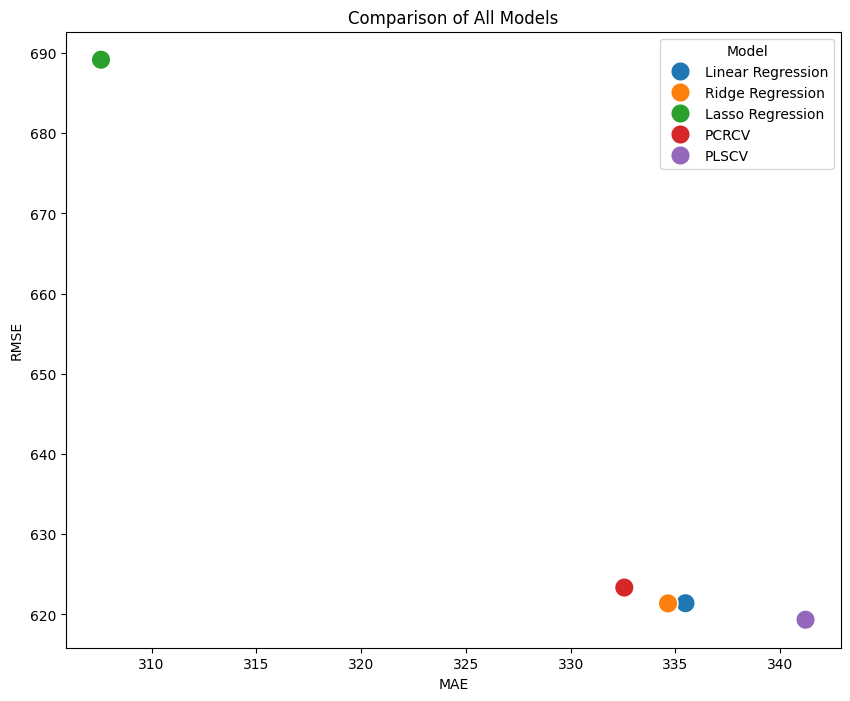

In [36]:
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(res,x="MAE",y="RMSE", hue = 'Model', s =200)
ax.set(title="Comparison of All Models")

# Problem 5

Let's do it in R

![](pic/Gheimeh.png)

In [37]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

## Part A

In [38]:
# rng = np.random.default_rng(1)
# x = rng.normal(size=100)
# epsilon = rng.normal(size=100).reshape(-1,1)

ro.r('''
set.seed(1)
x = rnorm(100)
epsilon = rnorm(100)
     ''')

## Part B

In [39]:
# X = pd.DataFrame(np.matrix([np.ones((100,)),x,x**2,x**3])).T
# X
beta = np.matrix([2,5,-6,4])
# y = X.dot(beta.T)
# y = np.array(y + epsilon).reshape(-1,)

ro.r('''
beta = c(2,5,-6,4)
df = data.frame(x=x)
df_col_names = c('x')
for (i in 2:10){
  df_col_names = c(df_col_names,paste('x',i, sep = ''))
  df = cbind(df,x^i)
}
colnames(df) = df_col_names
df$y = beta[1] + beta[2]*df$x + beta[3]*df$x2 + beta[4]*df$x3 + epsilon
''')

Now we need to convert it to pandas

In [40]:
ro.r['df']

x,x2,x3,...,x9,x10,y
-0.626454,0.392444,-0.245848,...,-0.014859,0.009309,-5.090695
0.183643,0.033725,0.006193,,0.000000,0.000000,2.782757
-0.835629,0.698275,-0.583499,,-0.198664,0.166010,-9.612711
1.595281,2.544921,4.059863,,66.916659,106.750862,11.104361
...,...,...,,...,...,...
-1.276592,1.629688,-2.080447,,-9.004709,11.495342,-21.041716
-0.573265,0.328633,-0.188394,,-0.006687,0.003833,-4.607550
-1.224613,1.499676,-1.836522,,-6.194248,7.585554,-20.055234
-0.473401,0.224108,-0.106093,,-0.001194,0.000565,-2.517100


In [41]:
with (ro.default_converter + pandas2ri.converter).context():
  pd_from_r_df = ro.conversion.get_conversion().rpy2py(ro.r['df'])
pd_from_r_df

,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
1,-0.626454,0.392444,-0.245848,0.154013,-0.096482,0.060441,-0.037864,0.023720,-1.485941e-02,9.308733e-03,-5.090695
2,0.183643,0.033725,0.006193,0.001137,0.000209,0.000038,0.000007,0.000001,2.375616e-07,4.362661e-08,2.782757
3,-0.835629,0.698275,-0.583499,0.487588,-0.407443,0.340471,-0.284507,0.237742,-1.986642e-01,1.660095e-01,-9.612711
4,1.595281,2.544921,4.059863,6.476622,10.332031,16.482490,26.294201,41.946633,6.691666e+01,1.067509e+02,11.104361
5,0.329508,0.108575,0.035776,0.011789,0.003884,0.001280,0.000422,0.000139,4.579214e-05,1.508887e-05,2.484608
...,...,...,...,...,...,...,...,...,...,...,...
96,0.558486,0.311907,0.174196,0.097286,0.054333,0.030344,0.016947,0.009465,5.285835e-03,2.952067e-03,2.569789
97,-1.276592,1.629688,-2.080447,2.655882,-3.390478,4.328258,-5.525420,7.053709,-9.004709e+00,1.149534e+01,-21.041716
98,-0.573265,0.328633,-0.188394,0.108000,-0.061913,0.035492,-0.020347,0.011664,-6.686543e-03,3.833164e-03,-4.607550
99,-1.224613,1.499676,-1.836522,2.249028,-2.754188,3.372814,-4.130390,5.058128,-6.194248e+00,7.585554e+00,-20.055234


![](../Adv_AI/P1/pic/pb.gif)

Text(0, 0.5, 'y')

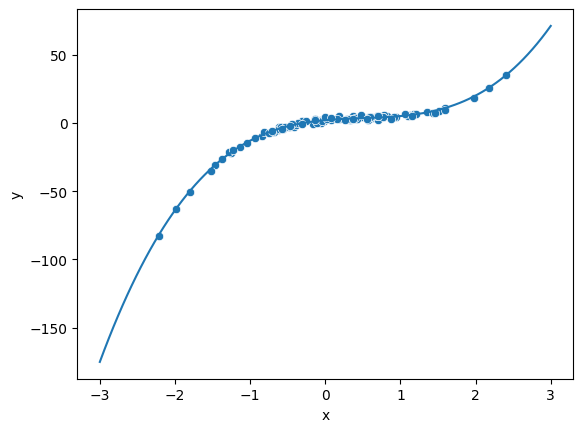

In [42]:
x_gen = np.linspace(-3, 3, 100)
y_gen =  beta[0,1]*x_gen + beta[0,2]*x_gen**2 + beta[0,3]*x_gen**3 + beta[0,0]

sns.scatterplot(x = pd_from_r_df['x'],y = pd_from_r_df['y'])
plt.plot(x_gen, y_gen)
plt.xlabel('x')
plt.ylabel('y')

## Part C

There is a very weird bug in `StepReg` library (version 1.6.1)

The following code gives error but when I import a dataset, everything is ok!

```
library(StepReg)
df2 = data.frame(x=rnorm(100),y=rnorm(100), mpg = rnorm(100))
stepwise(y~.,df2)
```

gives the error

```
Error in if (is.nan(f[1])) { : argument is of length zero
```

I don't have much time to investigate this!

In [43]:
ro.r('''
library(StepReg)
print(stepwise(y~.,df, strategy = 'forward', metric = 'CP'))
print(beta)
''')

$forward
$forward$CP

Call:
lm(formula = y ~ 1 + x3 + x2 + x + x5, data = data, weights = NULL)

Coefficients:
(Intercept)           x3           x2            x           x5  
    2.07201      3.55797     -6.15424      5.38746      0.08072  



[1]  2  5 -6  4


## Part D

In [44]:
ro.r('''
library(StepReg)
print(stepwise(y~.,df, strategy = 'backward', metric = 'CP'))
print(beta)
''')

$backward
$backward$CP

Call:
lm(formula = y ~ 1 + x + x2 + x3 + x9, data = data, weights = NULL)

Coefficients:
(Intercept)            x           x2           x3           x9  
   2.079236     5.231906    -6.166506     3.819556     0.001291  



[1]  2  5 -6  4


## Part E

In [49]:
nprange = np.arange(0.0001,9,0.01)

In [50]:
X = pd_from_r_df.drop(['y'], axis=1)
y = pd_from_r_df['y']
model = LassoCV(random_state=45, max_iter=100000000, alphas=nprange, n_jobs= -1, cv = 5).fit(X,y)
print(f'Intercept = {model.intercept_}')
for i in range(1,11):
    print(f'{model.coef_[i-1]} x^{i}')
print(f'alpha = {model.alpha_}')

Intercept = 2.052753925775596
5.367859438913757 x^1
-6.015866488660075 x^2
3.53251721700463 x^3
-0.0 x^4
0.09694687956858458 x^5
-0.11767798737917035 x^6
0.0 x^7
0.0443350997507278 x^8
-0.00043356603879185024 x^9
-0.004225916129081893 x^10
alpha = 0.0101


It does not give us the scores so we need to do it in another way

In [51]:
model2 = GridSearchCV(Lasso(max_iter= 100000000, random_state = 45),param_grid = {'alpha' : nprange}, n_jobs = -1, cv = 5, scoring='r2',return_train_score=True).fit(X,y)

Intercept = 2.052753925775596
5.367859438913757 x^1
-6.015866488660075 x^2
3.53251721700463 x^3
-0.0 x^4
0.09694687956858458 x^5
-0.11767798737917035 x^6
0.0 x^7
0.0443350997507278 x^8
-0.00043356603879185024 x^9
-0.004225916129081893 x^10
alpha = 0.0101


Text(0, 0.5, 'R^2')

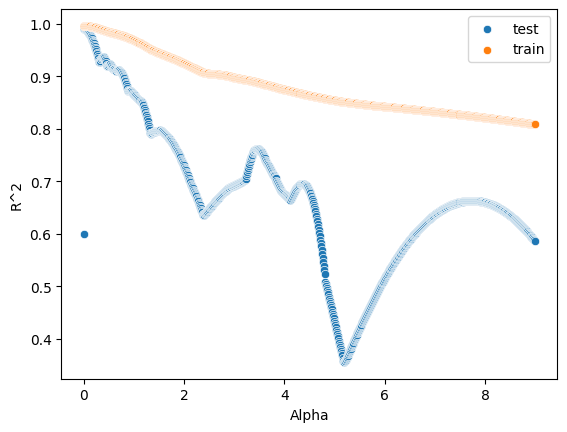

In [52]:
print(f'Intercept = {model2.best_estimator_.intercept_}')
for i in range(1,11):
    print(f'{model2.best_estimator_.coef_[i-1]} x^{i}')
print(f'alpha = {model2.best_estimator_.alpha}')
sns.scatterplot(x = model2.cv_results_['param_alpha'].data, y = model2.cv_results_['mean_test_score'], label = 'test')
sns.scatterplot(x = model2.cv_results_['param_alpha'].data, y = model2.cv_results_['mean_train_score'], label = 'train')
plt.xlabel('Alpha')
plt.ylabel('R^2')

## Part F

$forward
$forward$CP

Call:
lm(formula = y ~ 1 + x7, data = data, weights = NULL)

Coefficients:
(Intercept)           x7  
          2            7  



[1] 2 7


R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1:   
R callback write-console: In summary.lm(best_candidate_model) :  
R callback write-console: 
   
R callback write-console:  essentially perfect fit: summary may be unreliable
  
R callback write-console: 2:   
R callback write-console: In summary.lm(model_train) :  
R callback write-console: 
   
R callback write-console:  essentially perfect fit: summary may be unreliable
  


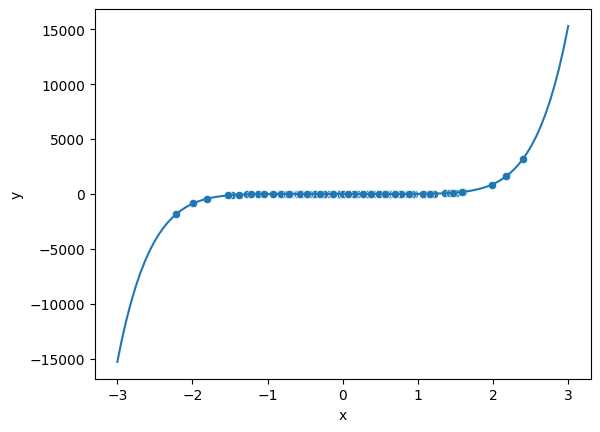

In [54]:
ro.r('''
set.seed(1)
x = rnorm(100)
epsilon = rnorm(100)
     ''')
beta = np.matrix([2,7])

ro.r('''
beta = c(2,7)
df = data.frame(x=x)
df_col_names = c('x')
for (i in 2:10){
  df_col_names = c(df_col_names,paste('x',i, sep = ''))
  df = cbind(df,x^i)
}
colnames(df) = df_col_names
df$y = beta[1] + beta[2]*df$x7
''')
with (ro.default_converter + pandas2ri.converter).context():
  pd_from_r_df = ro.conversion.get_conversion().rpy2py(ro.r['df'])
pd_from_r_df
x_gen = np.linspace(-3, 3, 100)
y_gen =  beta[0,1]*x_gen**7 + beta[0,0]

sns.scatterplot(x = pd_from_r_df['x'],y = pd_from_r_df['y'])
plt.plot(x_gen, y_gen)
plt.xlabel('x')
plt.ylabel('y')
ro.r('''
library(StepReg)
print(stepwise(y~.,df, strategy = 'forward', metric = 'CP'))
print(beta)
''')
X = pd_from_r_df.drop(['y'], axis=1)
y = pd_from_r_df['y']
model2 = GridSearchCV(Lasso(max_iter= 100000000, random_state = 45),param_grid = {'alpha' : nprange}, n_jobs = -1, cv = 5, scoring='r2',return_train_score=True).fit(X,y)


Intercept = 2.0290692188053114
0.0 x^1
0.0 x^2
0.0 x^3
0.0 x^4
0.0 x^5
0.0 x^6
6.9497099390544195 x^7
0.0 x^8
0.00994677831346012 x^9
-0.0003692459695316392 x^10
alpha = 1.2301


Text(0, 0.5, 'R^2')

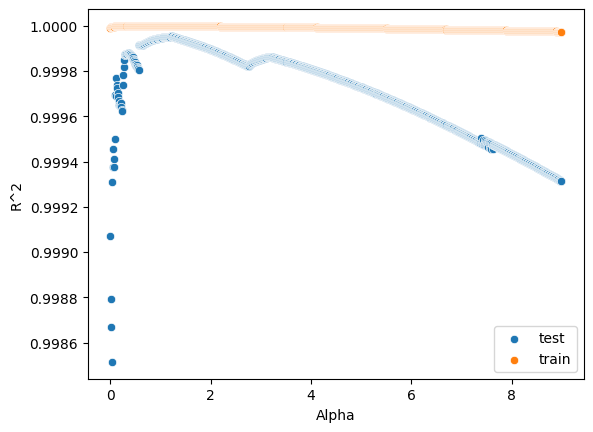

In [55]:
print(f'Intercept = {model2.best_estimator_.intercept_}')
for i in range(1,11):
    print(f'{model2.best_estimator_.coef_[i-1]} x^{i}')
print(f'alpha = {model2.best_estimator_.alpha}')
sns.scatterplot(x = model2.cv_results_['param_alpha'].data, y = model2.cv_results_['mean_test_score'], label = 'test')
sns.scatterplot(x = model2.cv_results_['param_alpha'].data, y = model2.cv_results_['mean_train_score'], label = 'train')
plt.xlabel('Alpha')
plt.ylabel('R^2')

# Problem 6

## Part A

## Part B

## Part C

## Part D

## Part E

## Part F

## Part G